# SQL and Data Reading 

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns

In [2]:
#Read the mta_data from db file. Pre-pandemic data is from 01/2020 to 04/2020 and post-pandemic data is from 05/2021 to 08/2021
engine = create_engine("sqlite:///mta_data.db")
engine.table_names()

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  This is separate from the ipykernel package so we can avoid doing imports until


['mta_data']

In [3]:
all_tables=engine.table_names()
all_tables

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['mta_data']

In [4]:
con = sqlite3.connect("mta_data.db")
mta_data = pd.read_sql_query("SELECT * from mta_data",con)
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661


In [5]:
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661
...,...,...,...,...,...,...,...,...,...,...,...
5609317,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,04:00:00,REGULAR,5554,420
5609318,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,08:00:00,REGULAR,5554,420
5609319,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,12:00:00,REGULAR,5554,420
5609320,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/31/2020,16:00:00,REGULAR,5554,420


In [6]:
#convert the type of date and time to datetime frame
mta_data.info()
mta_data['DATE_TIME'] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, format="%m/%d/%Y %H:%M:%S")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609322 entries, 0 to 5609321
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 470.8+ MB


# Data Cleaning

In [7]:
# Dropping duplicate data
mta_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)
mta_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
mta_data.drop(["DESC"], axis=1, errors="ignore", inplace=True)
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
5404181,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,03:00:00,7356095,2493703,2020-01-25 03:00:00
5404182,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,07:00:00,7356105,2493714,2020-01-25 07:00:00
5404183,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,11:00:00,7356170,2493761,2020-01-25 11:00:00
5404184,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,15:00:00,7356333,2493812,2020-01-25 15:00:00
5404185,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,19:00:00,7356581,2493862,2020-01-25 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...
209458,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,5554,589,2021-07-30 05:00:00
209459,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,5554,589,2021-07-30 09:00:00
209460,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,5554,589,2021-07-30 13:00:00
209461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,5554,590,2021-07-30 17:00:00


# Ridership Entries and Exists

In [8]:
#calculate the daily entries and exists
daily = (mta_data.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[['ENTRIES', 'EXITS']].max())
daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,01/25/2020,7356730,2493891
1,A002,R051,02-00-00,59 ST,01/26/2020,7357340,2494073
2,A002,R051,02-00-00,59 ST,01/27/2020,7358737,2494508
3,A002,R051,02-00-00,59 ST,01/28/2020,7360060,2494981
4,A002,R051,02-00-00,59 ST,01/29/2020,7361355,2495494


In [9]:
# New column for entries and exits from previous day
daily["PREVIOUS_ENTRIES"] = daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['ENTRIES'].shift(1)
daily["PREVIOUS_EXITS"] = daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['EXITS'].shift(1)

daily.dropna(subset=['PREVIOUS_ENTRIES', 'PREVIOUS_EXITS'], axis=0, inplace=True)

daily.info()
daily = daily.astype({'PREVIOUS_ENTRIES': 'int32', 'ENTRIES': 'int32', 'EXITS':'int32', 'PREVIOUS_EXITS': 'int32'})
daily

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931468 entries, 1 to 936544
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   C/A               931468 non-null  object 
 1   UNIT              931468 non-null  object 
 2   SCP               931468 non-null  object 
 3   STATION           931468 non-null  object 
 4   DATE              931468 non-null  object 
 5   ENTRIES           931468 non-null  int64  
 6   EXITS             931468 non-null  int64  
 7   PREVIOUS_ENTRIES  931468 non-null  float64
 8   PREVIOUS_EXITS    931468 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 71.1+ MB


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREVIOUS_ENTRIES,PREVIOUS_EXITS
1,A002,R051,02-00-00,59 ST,01/26/2020,7357340,2494073,7356730,2493891
2,A002,R051,02-00-00,59 ST,01/27/2020,7358737,2494508,7357340,2494073
3,A002,R051,02-00-00,59 ST,01/28/2020,7360060,2494981,7358737,2494508
4,A002,R051,02-00-00,59 ST,01/29/2020,7361355,2495494,7360060,2494981
5,A002,R051,02-00-00,59 ST,01/30/2020,7362672,2496048,7361355,2495494
...,...,...,...,...,...,...,...,...,...
936540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,5554,588,5554,588
936541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,5554,589,5554,588
936542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,5554,589,5554,589
936543,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,5554,589,5554,589


In [10]:
daily[daily["ENTRIES"] < daily["PREVIOUS_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREVIOUS_ENTRIES,PREVIOUS_EXITS
847,A002,R051,02-03-02,59 ST,04/24/2021,13592,17510,6542858,8731114
2099,A002,R051,02-06-00,59 ST,02/14/2020,2050,49,83074,2855
3104,A006,R079,00-00-04,5 AV/59 ST,04/14/2020,49,11,7896805,3415899
3259,A006,R079,00-03-00,5 AV/59 ST,03/11/2020,939,345,9438081,4099748
4799,A007,R079,01-06-03,5 AV/59 ST,04/08/2020,22,5,7832211,2864420


In [11]:
# The counter is in reverse 
mask = ((mta_data["C/A"] == "A002") & 
(mta_data["UNIT"] == "R051") & 
(mta_data["SCP"] == "02-03-02") & 
(mta_data["STATION"] == "59 ST") &
(mta_data["DATE"] == '04/24/2021'))

In [12]:
# Let's see how many stations have this problem
(daily[daily["ENTRIES"] < daily["PREVIOUS_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST                1
             02-06-00  59 ST                1
A006   R079  00-00-04  5 AV/59 ST           1
             00-03-00  5 AV/59 ST           1
A007   R079  01-06-03  5 AV/59 ST           1
                                         ... 
R729   R292  00-00-01  BAYCHESTER AV        1
R730   R431  00-00-04  EASTCHSTER/DYRE    183
S101   R070  00-00-04  ST. GEORGE           1
TRAM1  R468  00-00-01  RIT-MANHATTAN        1
TRAM2  R469  00-05-00  RIT-ROOSEVELT        1
Length: 798, dtype: int64

In [13]:
def get_daily_entry_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREVIOUS_ENTRIES"] 
    if counter < 0:
        counter = -counter  # adjust the "reverse" counter   
    if counter > max_counter:
        # the counter was reset, so take the minimum
        print(f'ENTRIES: {row["ENTRIES"]} <-- {row["PREVIOUS_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREVIOUS_ENTRIES"])  
    if counter > max_counter:
        # If the number is too big, set to zero
        return 0
    return counter
daily["DAILY_ENTRIES"] = daily.apply(get_daily_entry_counts, axis=1, max_counter=10000)

ENTRIES: 7561578 <-- 7415437
ENTRIES: 6698606 <-- 6591216
ENTRIES: 1426120 <-- 1376848
ENTRIES: 1581359 <-- 1443391
ENTRIES: 13592 <-- 6542858
ENTRIES: 6141640 <-- 6051756
ENTRIES: 7560642 <-- 7458764
ENTRIES: 12140730 <-- 11942277
ENTRIES: 9465678 <-- 9342436
ENTRIES: 524289 <-- 152
ENTRIES: 2050 <-- 83074
ENTRIES: 128472 <-- 42583
ENTRIES: 4445194 <-- 4288803
ENTRIES: 5552060 <-- 5432104
ENTRIES: 6536356 <-- 6462424
ENTRIES: 3279027 <-- 3227854
ENTRIES: 49 <-- 7896805
ENTRIES: 63016 <-- 253
ENTRIES: 939 <-- 9438081
ENTRIES: 62891 <-- 3755
ENTRIES: 697098 <-- 596515
ENTRIES: 1118794 <-- 959981
ENTRIES: 262144 <-- 0
ENTRIES: 739611 <-- 704586
ENTRIES: 119764964 <-- 119667145
ENTRIES: 5172149 <-- 5114150
ENTRIES: 22 <-- 7832211
ENTRIES: 93403 <-- 401
ENTRIES: 5113290 <-- 4953530
ENTRIES: 15676977 <-- 15590201
ENTRIES: 11461227 <-- 11399096
ENTRIES: 3875096 <-- 3819510
ENTRIES: 4839820 <-- 4757208
ENTRIES: 2302431 <-- 2173398
ENTRIES: 19906247 <-- 19704041
ENTRIES: 3968432 <-- 3500659
EN

ENTRIES: 9732284 <-- 9541519
ENTRIES: 694554 <-- 570228
ENTRIES: 6437845 <-- 6267639
ENTRIES: 17386054 <-- 17108217
ENTRIES: 43534 <-- 865450
ENTRIES: 48341 <-- 646956
ENTRIES: 658 <-- 218052
ENTRIES: 26 <-- 35637
ENTRIES: 25 <-- 1391941
ENTRIES: 190004 <-- 171896
ENTRIES: 163843 <-- 139479
ENTRIES: 563105 <-- 516863
ENTRIES: 262402 <-- 29537
ENTRIES: 786432 <-- 0
ENTRIES: 9520767 <-- 9456957
ENTRIES: 2152318 <-- 2056289
ENTRIES: 362484 <-- 265319
ENTRIES: 2419832 <-- 2333032
ENTRIES: 6549332 <-- 6467870
ENTRIES: 115306 <-- 103364
ENTRIES: 595311 <-- 544765
ENTRIES: 63 <-- 53415
ENTRIES: 14600 <-- 1332
ENTRIES: 54390 <-- 1171313
ENTRIES: 2069313 <-- 1974786
ENTRIES: 20720 <-- 1183220
ENTRIES: 2291507 <-- 2230911
ENTRIES: 2461004 <-- 2360096
ENTRIES: 3075236 <-- 2957745
ENTRIES: 3678437 <-- 3525198
ENTRIES: 274756 <-- 249339
ENTRIES: 1243203 <-- 1172125
ENTRIES: 16562 <-- 1609635
ENTRIES: 756262099 <-- 756103347
ENTRIES: 327866 <-- 756269765
ENTRIES: 1132 <-- 328024
ENTRIES: 8062118 <--

ENTRIES: 13672 <-- 240673
ENTRIES: 458754 <-- 262214
ENTRIES: 8 <-- 458758
ENTRIES: 5240 <-- 302927
ENTRIES: 2843550 <-- 2803485
ENTRIES: 825242 <-- 752590
ENTRIES: 143547 <-- 955727457
ENTRIES: 282759 <-- 780985
ENTRIES: 447338 <-- 282981
ENTRIES: 3312725 <-- 3118034
ENTRIES: 19824196 <-- 19677348
ENTRIES: 94584 <-- 210
ENTRIES: 19676995 <-- 17126295
ENTRIES: 17126319 <-- 19676995
ENTRIES: 5286466 <-- 17126463
ENTRIES: 15065838 <-- 17126282
ENTRIES: 15222152 <-- 15067439
ENTRIES: 25525735 <-- 15065804
ENTRIES: 25735994 <-- 25531696
ENTRIES: 12309516 <-- 25525671
ENTRIES: 12746146 <-- 12323966
ENTRIES: 241888 <-- 118419
ENTRIES: 9536763 <-- 9393223
ENTRIES: 269759 <-- 2219346
ENTRIES: 3249549 <-- 3225271
ENTRIES: 415480 <-- 7509967
ENTRIES: 14504116 <-- 14383999
ENTRIES: 15273598 <-- 15066167
ENTRIES: 2185668 <-- 2143710
ENTRIES: 413200 <-- 377259
ENTRIES: 1695761 <-- 1611504
ENTRIES: 7700179 <-- 7591437
ENTRIES: 569162 <-- 453527
ENTRIES: 9167612 <-- 8910626
ENTRIES: 1495942 <-- 14213

ENTRIES: 290158 <-- 211918
ENTRIES: 1157 <-- 415519
ENTRIES: 76987 <-- 11966
ENTRIES: 1492 <-- 444245
ENTRIES: 99049 <-- 13535
ENTRIES: 169 <-- 841352
ENTRIES: 198265 <-- 701
ENTRIES: 17924273 <-- 17790085
ENTRIES: 9185003 <-- 9108206
ENTRIES: 594388 <-- 532320
ENTRIES: 4600054 <-- 4496354
ENTRIES: 5574470 <-- 5534697
ENTRIES: 744 <-- 345355
ENTRIES: 510 <-- 4684010
ENTRIES: 83902495 <-- 22969
ENTRIES: 4249830 <-- 4106209
ENTRIES: 37428 <-- 8854275
ENTRIES: 9765548 <-- 9720285
ENTRIES: 534639 <-- 473177
ENTRIES: 720234 <-- 637049
ENTRIES: 679381 <-- 593512
ENTRIES: 490158 <-- 413443
ENTRIES: 3295502 <-- 3229286
ENTRIES: 4123453 <-- 4047649
ENTRIES: 2400941 <-- 2288602
ENTRIES: 15819911 <-- 15695295
ENTRIES: 17730364 <-- 17560705
ENTRIES: 23308296 <-- 23066117
ENTRIES: 10725613 <-- 10669212
ENTRIES: 507172198 <-- 507056070
ENTRIES: 9677662 <-- 9544248
ENTRIES: 2149494 <-- 2059206
ENTRIES: 328419 <-- 197420
ENTRIES: 0 <-- 589824
ENTRIES: 51247126 <-- 51220549
ENTRIES: 2691285 <-- 2625529

ENTRIES: 6633541 <-- 6457474
ENTRIES: 6223321 <-- 6083572
ENTRIES: 15121404 <-- 14880532
ENTRIES: 16835535 <-- 16313499
ENTRIES: 3483603 <-- 3377973
ENTRIES: 461270 <-- 405481
ENTRIES: 3728274 <-- 3679945
ENTRIES: 5417984 <-- 5338705
ENTRIES: 262174 <-- 50332020
ENTRIES: 102781373 <-- 102653920
ENTRIES: 5859391 <-- 5766112
ENTRIES: 6019875 <-- 5898924
ENTRIES: 7297008 <-- 7163205
ENTRIES: 10293721 <-- 10055273
ENTRIES: 6434875 <-- 6309692
ENTRIES: 3570381 <-- 3480357
ENTRIES: 1212434 <-- 1074049
ENTRIES: 2778354 <-- 2721902
ENTRIES: 1216880 <-- 1072596
ENTRIES: 4805568 <-- 4774632
ENTRIES: 54 <-- 9046801
ENTRIES: 50217 <-- 6099
ENTRIES: 1396114 <-- 8137947
ENTRIES: 9597433 <-- 9502123
ENTRIES: 7766725 <-- 7631359
ENTRIES: 83553 <-- 4158341
ENTRIES: 21947255 <-- 21487510
ENTRIES: 308 <-- 1516981
ENTRIES: 70725 <-- 9225
ENTRIES: 64980 <-- 5550002
ENTRIES: 7355258 <-- 7196200
ENTRIES: 6962194 <-- 6812976
ENTRIES: 680 <-- 576827
ENTRIES: 79807 <-- 14440
ENTRIES: 6983847 <-- 6852334
ENTRIES

ENTRIES: 4013305 <-- 3608979
ENTRIES: 7572026 <-- 7163316
ENTRIES: 7432008 <-- 7106075
ENTRIES: 1076 <-- 7489966
ENTRIES: 50225 <-- 2304027
ENTRIES: 9824726 <-- 9618023
ENTRIES: 4204591 <-- 4055420
ENTRIES: 353381 <-- 9913214
ENTRIES: 8404451 <-- 8059432
ENTRIES: 16777220 <-- 1037157
ENTRIES: 3498049 <-- 3186686
ENTRIES: 20708515 <-- 20473641
ENTRIES: 1145001 <-- 924749
ENTRIES: 74216 <-- 55352
ENTRIES: 1624562577 <-- 1624792728
ENTRIES: 34504 <-- 1242107667
ENTRIES: 370931 <-- 281005
ENTRIES: 381566 <-- 274995
ENTRIES: 300382575 <-- 300350244
ENTRIES: 81056 <-- 70567
ENTRIES: 89090 <-- 56836
ENTRIES: 8423636 <-- 8396757
ENTRIES: 1754964 <-- 1730749
ENTRIES: 1430384 <-- 1348893
ENTRIES: 2156839 <-- 1854695
ENTRIES: 3570235 <-- 3368253
ENTRIES: 1765804 <-- 1523561
ENTRIES: 5326510 <-- 5003105
ENTRIES: 55482023 <-- 55713787
ENTRIES: 6113862 <-- 5774188
ENTRIES: 3627050 <-- 3349420
ENTRIES: 5112655 <-- 4701879
ENTRIES: 6092613 <-- 5836422
ENTRIES: 463 <-- 6101664
ENTRIES: 1651896 <-- 1506

ENTRIES: 1043822318 <-- 1043698279
ENTRIES: 1956546 <-- 1696123
ENTRIES: 8284349 <-- 7980411
ENTRIES: 414887 <-- 143531
ENTRIES: 5429478 <-- 5205942
ENTRIES: 1126115 <-- 1018452
ENTRIES: 2118995 <-- 2028403
ENTRIES: 787676 <-- 731447
ENTRIES: 1878610 <-- 1811151
ENTRIES: 623647 <-- 575690
ENTRIES: 1841 <-- 6567565
ENTRIES: 7745 <-- 46175
ENTRIES: 5518546 <-- 5359468
ENTRIES: 3057394 <-- 2861750
ENTRIES: 1253922941 <-- 1254197966
ENTRIES: 574206 <-- 222258
ENTRIES: 2405 <-- 629192
ENTRIES: 2345406 <-- 1968135
ENTRIES: 7948173 <-- 492715
ENTRIES: 492823 <-- 7948173
ENTRIES: 5181972 <-- 1987199
ENTRIES: 1987598 <-- 5181972
ENTRIES: 2004369 <-- 1989416
ENTRIES: 2298 <-- 176452
ENTRIES: 1007893 <-- 35310
ENTRIES: 36155 <-- 1007893
ENTRIES: 52458 <-- 39079
ENTRIES: 3243901 <-- 3214183
ENTRIES: 4636552 <-- 4586032
ENTRIES: 2551309 <-- 2460077
ENTRIES: 568283 <-- 140481
ENTRIES: 147093 <-- 568283
ENTRIES: 303719 <-- 170435
ENTRIES: 26485164 <-- 26261870
ENTRIES: 1259451 <-- 985634
ENTRIES: 238

ENTRIES: 53947 <-- 41682
ENTRIES: 414 <-- 77116
ENTRIES: 24778 <-- 1356
ENTRIES: 34 <-- 95857
ENTRIES: 34516 <-- 89
ENTRIES: 202465 <-- 153290
ENTRIES: 175578 <-- 92507
ENTRIES: 329 <-- 15875
ENTRIES: 14820 <-- 4730
ENTRIES: 437738 <-- 134667
ENTRIES: 134757 <-- 437738
ENTRIES: 177431 <-- 135066
ENTRIES: 66921 <-- 251578
ENTRIES: 441089 <-- 329151
ENTRIES: 593219 <-- 438972
ENTRIES: 846032 <-- 580017
ENTRIES: 878401 <-- 551196
ENTRIES: 89729 <-- 728263
ENTRIES: 1507 <-- 214302
ENTRIES: 11357 <-- 61927
ENTRIES: 881 <-- 19876
ENTRIES: 394783 <-- 324
ENTRIES: 1778 <-- 72924
ENTRIES: 92515 <-- 8558
ENTRIES: 894 <-- 114113
ENTRIES: 1418 <-- 57238
ENTRIES: 1343 <-- 20738
ENTRIES: 814 <-- 15055
ENTRIES: 1046 <-- 26305
ENTRIES: 20 <-- 10407
ENTRIES: 210170 <-- 96978
ENTRIES: 397499 <-- 277463
ENTRIES: 315380 <-- 204955
ENTRIES: 202673 <-- 131530
ENTRIES: 213326 <-- 147577
ENTRIES: 104556 <-- 69567
ENTRIES: 27345 <-- 38942
ENTRIES: 25 <-- 21772
ENTRIES: 67509 <-- 23066
ENTRIES: 393 <-- 77005
EN

ENTRIES: 2784037 <-- 2731269
ENTRIES: 2007663 <-- 1965720
ENTRIES: 1248093 <-- 1234484
ENTRIES: 2169416 <-- 1773439
ENTRIES: 1096099 <-- 1065677
ENTRIES: 868649 <-- 851369
ENTRIES: 1182998 <-- 1155568
ENTRIES: 25830 <-- 3366094
ENTRIES: 3103618 <-- 3002113
ENTRIES: 744388 <-- 637870
ENTRIES: 18048 <-- 11848950
ENTRIES: 2116113036 <-- 2116080200
ENTRIES: 605701 <-- 580907
ENTRIES: 2462374 <-- 2414899
ENTRIES: 8887721 <-- 8762784
ENTRIES: 4124151 <-- 4052274
ENTRIES: 143873 <-- 114723
ENTRIES: 327680 <-- 3
ENTRIES: 4254 <-- 9837391
ENTRIES: 12193640 <-- 12152469
ENTRIES: 8763720 <-- 8695000
ENTRIES: 14687989 <-- 14489905
ENTRIES: 10397985 <-- 10320309
ENTRIES: 3301657 <-- 3259252
ENTRIES: 11511549 <-- 11436581
ENTRIES: 901495 <-- 882977
ENTRIES: 662621 <-- 651138
ENTRIES: 552412 <-- 541503
ENTRIES: 589829 <-- 133062
ENTRIES: 1878555 <-- 1835664
ENTRIES: 9984632 <-- 9936916
ENTRIES: 373362 <-- 255906
ENTRIES: 28327 <-- 216109
ENTRIES: 109539 <-- 94056
ENTRIES: 3137533 <-- 3070067
ENTRIES:

ENTRIES: 4886986 <-- 4800638
ENTRIES: 22777387 <-- 22421915
ENTRIES: 51576 <-- 1850141
ENTRIES: 325 <-- 753254
ENTRIES: 86468 <-- 14176
ENTRIES: 4245888 <-- 4083888
ENTRIES: 25136 <-- 986561
ENTRIES: 3525 <-- 1626212
ENTRIES: 13 <-- 510293
ENTRIES: 419417 <-- 63064
ENTRIES: 369282 <-- 152193
ENTRIES: 3415388 <-- 3309127
ENTRIES: 3156695 <-- 3098748
ENTRIES: 1571541 <-- 1533870
ENTRIES: 404157 <-- 390519
ENTRIES: 1299474 <-- 1250182
ENTRIES: 2938333 <-- 2851460
ENTRIES: 182865 <-- 55446
ENTRIES: 441677 <-- 167136
ENTRIES: 520215 <-- 198513
ENTRIES: 1633 <-- 9277595
ENTRIES: 654455343 <-- 2615085
ENTRIES: 67281748 <-- 295534
ENTRIES: 1210313 <-- 1062250
ENTRIES: 3384477 <-- 3285640
ENTRIES: 2403759 <-- 2167140
ENTRIES: 1126996 <-- 896461
ENTRIES: 4103674 <-- 3896661
ENTRIES: 2199875 <-- 2056820
ENTRIES: 262144 <-- 1
ENTRIES: 10529739 <-- 10269959
ENTRIES: 10559809 <-- 10425301
ENTRIES: 4797948 <-- 4597180
ENTRIES: 135348726 <-- 135283514
ENTRIES: 3939 <-- 65730
ENTRIES: 32313 <-- 45981
E

ENTRIES: 239411 <-- 228202
ENTRIES: 1734185 <-- 1704008
ENTRIES: 1457464 <-- 1402700
ENTRIES: 31371770 <-- 31317243
ENTRIES: 4373311 <-- 4347803
ENTRIES: 7301662 <-- 7274987
ENTRIES: 4949891 <-- 4924308
ENTRIES: 6068710 <-- 6030876
ENTRIES: 13845665 <-- 13759090
ENTRIES: 622273 <-- 603349
ENTRIES: 742209 <-- 721750
ENTRIES: 633220 <-- 617490
ENTRIES: 5571207 <-- 5539990
ENTRIES: 1530501 <-- 1468901
ENTRIES: 569516130 <-- 569477759
ENTRIES: 422965 <-- 383233
ENTRIES: 8278427 <-- 8239272
ENTRIES: 200418 <-- 160764
ENTRIES: 1151999 <-- 1116983
ENTRIES: 8907506 <-- 8842117
ENTRIES: 7933170 <-- 7869683
ENTRIES: 855819 <-- 717537
ENTRIES: 9311672 <-- 9243477
ENTRIES: 3173528 <-- 3149556
ENTRIES: 27 <-- 172872
ENTRIES: 2029543 <-- 1983812
ENTRIES: 1701291 <-- 1621826
ENTRIES: 3428904 <-- 3323713
ENTRIES: 27 <-- 2549195
ENTRIES: 73140 <-- 2247
ENTRIES: 5033210 <-- 4874697
ENTRIES: 7121306 <-- 6886196
ENTRIES: 4932302 <-- 4918187
ENTRIES: 7375578 <-- 7335139
ENTRIES: 18828314 <-- 18746438
ENTRI

ENTRIES: 705116 <-- 508093
ENTRIES: 12562581 <-- 12302889
ENTRIES: 1748212 <-- 1461999
ENTRIES: 8794819 <-- 8591740
ENTRIES: 4502600 <-- 4368255
ENTRIES: 5722783 <-- 5613695
ENTRIES: 3137969 <-- 2967625
ENTRIES: 3044042 <-- 2989736
ENTRIES: 197015 <-- 155494
ENTRIES: 167047 <-- 112997
ENTRIES: 2679861 <-- 2526107
ENTRIES: 4919313 <-- 4844989
ENTRIES: 3143352 <-- 3054780
ENTRIES: 107895 <-- 60874
ENTRIES: 184678772 <-- 184659619
ENTRIES: 52976 <-- 39591
ENTRIES: 2846025 <-- 2782467
ENTRIES: 807408 <-- 786941
ENTRIES: 1081387 <-- 1057607
ENTRIES: 592208 <-- 581668
ENTRIES: 551857 <-- 380935
ENTRIES: 4688097 <-- 4569593
ENTRIES: 5748611 <-- 5576675
ENTRIES: 702 <-- 2944820
ENTRIES: 70031 <-- 16820
ENTRIES: 2580521 <-- 2531785
ENTRIES: 2287888 <-- 2242213
ENTRIES: 5763430 <-- 5640875
ENTRIES: 1256628 <-- 1188977
ENTRIES: 4516979 <-- 4405597
ENTRIES: 2679116 <-- 2630958
ENTRIES: 100695199 <-- 430716
ENTRIES: 100725330 <-- 100711007
ENTRIES: 637537564 <-- 2493709
ENTRIES: 637573892 <-- 63755

ENTRIES: 262144 <-- 458753
ENTRIES: 126890 <-- 110130
ENTRIES: 110266 <-- 98447
ENTRIES: 110765 <-- 100561
ENTRIES: 239136 <-- 219638
ENTRIES: 743968 <-- 670482
ENTRIES: 1302813 <-- 1211651
ENTRIES: 1884672 <-- 1755738
ENTRIES: 2205003 <-- 2062017
ENTRIES: 2284460 <-- 2151330
ENTRIES: 1979785 <-- 1874392
ENTRIES: 308287 <-- 227285
ENTRIES: 1185726 <-- 1133276
ENTRIES: 893084 <-- 854887
ENTRIES: 454778 <-- 419165
ENTRIES: 568195 <-- 522594
ENTRIES: 741303 <-- 685064
ENTRIES: 937 <-- 26490
ENTRIES: 196481 <-- 171649
ENTRIES: 5220782 <-- 5187467
ENTRIES: 241936 <-- 205503
ENTRIES: 211813 <-- 179912
ENTRIES: 168487 <-- 143548
ENTRIES: 135547 <-- 114798
ENTRIES: 123504 <-- 104800
ENTRIES: 209836 <-- 180657
ENTRIES: 3075438 <-- 3055914
ENTRIES: 7281558 <-- 7229223
ENTRIES: 3611080 <-- 3469615
ENTRIES: 13968422 <-- 13837726
ENTRIES: 545413 <-- 383500
ENTRIES: 474121 <-- 396642
ENTRIES: 2677924 <-- 2630069
ENTRIES: 430416 <-- 388313
ENTRIES: 116279 <-- 62625
ENTRIES: 4446308 <-- 4379481
ENTRIE

In [14]:
daily['DAILY_ENTRIES'].describe()

count    931468.000000
mean        460.361477
std         632.636246
min           0.000000
25%          53.000000
50%         242.000000
75%         607.000000
max        9986.000000
Name: DAILY_ENTRIES, dtype: float64

In [15]:
def get_daily_exit_counts(row, max_counter):
    counter = row["EXITS"] - row["PREVIOUS_EXITS"]    
    if counter < 0:
        counter = -counter  # adjust the "reverse" counter      
    if counter > max_counter:
        # the counter was reset, so take the minimum
        counter = min(row["EXITS"], row["PREVIOUS_EXITS"])  
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    return counter
daily["DAILY_EXITS"] = daily.apply(get_daily_exit_counts, axis=1, max_counter=10000)

In [16]:
daily['DAILY_EXITS'].describe()

count    931468.000000
mean        440.610182
std         639.396028
min           0.000000
25%          49.000000
50%         215.000000
75%         576.000000
max        9979.000000
Name: DAILY_EXITS, dtype: float64

In [17]:
daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREVIOUS_ENTRIES,PREVIOUS_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/26/2020,7357340,2494073,7356730,2493891,610,182
2,A002,R051,02-00-00,59 ST,01/27/2020,7358737,2494508,7357340,2494073,1397,435
3,A002,R051,02-00-00,59 ST,01/28/2020,7360060,2494981,7358737,2494508,1323,473
4,A002,R051,02-00-00,59 ST,01/29/2020,7361355,2495494,7360060,2494981,1295,513
5,A002,R051,02-00-00,59 ST,01/30/2020,7362672,2496048,7361355,2495494,1317,554


In [18]:
#the daily entries and exits for each station
stations_daily = daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES', 'DAILY_EXITS']].sum().reset_index()
stations_daily['DATE'] = pd.to_datetime(stations_daily['DATE'])
stations_daily.info()
stations_daily.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71097 entries, 0 to 71096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        71097 non-null  object        
 1   DATE           71097 non-null  datetime64[ns]
 2   DAILY_ENTRIES  71097 non-null  int64         
 3   DAILY_EXITS    71097 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.2+ MB


<bound method NDFrame.head of          STATION       DATE  DAILY_ENTRIES  DAILY_EXITS
0           1 AV 2020-01-26           5886         6500
1           1 AV 2020-01-27          16326        18845
2           1 AV 2020-01-28          17627        19885
3           1 AV 2020-01-29          18010        20137
4           1 AV 2020-01-30          18117        20421
...          ...        ...            ...          ...
71092  ZEREGA AV 2021-07-26           1059         1325
71093  ZEREGA AV 2021-07-27           1185         1489
71094  ZEREGA AV 2021-07-28           1107         1331
71095  ZEREGA AV 2021-07-29           1126         1362
71096  ZEREGA AV 2021-07-30           1111         1320

[71097 rows x 4 columns]>

In [19]:
#choose the top 10 stations with highest total entries and total exits
station_totals = stations_daily.groupby('STATION')[['DAILY_ENTRIES', 'DAILY_EXITS']].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)
station_totals.rename(columns = {'DAILY_ENTRIES': 'TOTAL_ENTRIES', 'DAILY_EXITS': 'TOTAL_EXITS'}, inplace=True)
top10_stations = station_totals.head(10)
top10_stations

,STATION,TOTAL_ENTRIES,TOTAL_EXITS
61,34 ST-PENN STA,10564362,11993129
233,GRD CNTRL-42 ST,8419925,9552196
59,34 ST-HERALD SQ,8176705,8992084
46,23 ST,7666424,7021440
68,42 ST-PORT AUTH,7029239,6839236
14,14 ST-UNION SQ,6790608,7774808
110,86 ST,6525653,7460171
9,125 ST,6349761,6617342
226,FULTON ST,6102570,6482467
353,TIMES SQ-42 ST,6087783,6944653


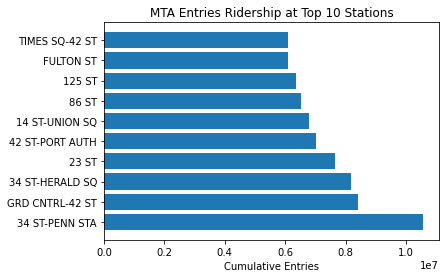

In [20]:
plt.barh(y=top10_stations['STATION'], width=top10_stations['TOTAL_ENTRIES'])
plt.xlabel("Cumulative Entries");
plt.title('MTA Entries Ridership at Top 10 Stations');

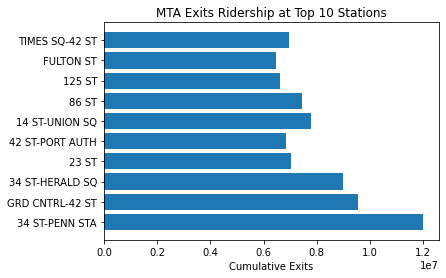

In [21]:
plt.barh(y=top10_stations['STATION'], width=top10_stations['TOTAL_EXITS'])
plt.xlabel("Cumulative Exits");
plt.title('MTA Exits Ridership at Top 10 Stations');

In [22]:
stations_daily['DAILY_TRAFFIC'] = stations_daily['DAILY_ENTRIES'] + stations_daily['DAILY_EXITS']
stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,1 AV,2020-01-26,5886,6500,12386
1,1 AV,2020-01-27,16326,18845,35171
2,1 AV,2020-01-28,17627,19885,37512
3,1 AV,2020-01-29,18010,20137,38147
4,1 AV,2020-01-30,18117,20421,38538
...,...,...,...,...,...
71092,ZEREGA AV,2021-07-26,1059,1325,2384
71093,ZEREGA AV,2021-07-27,1185,1489,2674
71094,ZEREGA AV,2021-07-28,1107,1331,2438
71095,ZEREGA AV,2021-07-29,1126,1362,2488


In [23]:
stations_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71097 entries, 0 to 71096
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        71097 non-null  object        
 1   DATE           71097 non-null  datetime64[ns]
 2   DAILY_ENTRIES  71097 non-null  int64         
 3   DAILY_EXITS    71097 non-null  int64         
 4   DAILY_TRAFFIC  71097 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.7+ MB


In [24]:
mask = (stations_daily['DATE'] > '2020-01-25') & (stations_daily['DATE'] <= '2020-12-31')
stations_daily2020=(stations_daily.loc[mask])
stations_daily2020

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,1 AV,2020-01-26,5886,6500,12386
1,1 AV,2020-01-27,16326,18845,35171
2,1 AV,2020-01-28,17627,19885,37512
3,1 AV,2020-01-29,18010,20137,38147
4,1 AV,2020-01-30,18117,20421,38538
...,...,...,...,...,...
70994,ZEREGA AV,2020-04-20,305,394,699
70995,ZEREGA AV,2020-04-21,298,407,705
70996,ZEREGA AV,2020-04-22,323,414,737
70997,ZEREGA AV,2020-04-23,326,380,706


In [25]:
mask = (stations_daily['DATE'] > '2021-01-01') & (stations_daily['DATE'] <= '2021-12-31')
stations_daily2021=(stations_daily.loc[mask])
stations_daily2021

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
90,1 AV,2021-04-24,5240,10622,15862
91,1 AV,2021-04-25,4578,8539,13117
92,1 AV,2021-04-26,6686,10734,17420
93,1 AV,2021-04-27,6895,11460,18355
94,1 AV,2021-04-28,7118,11741,18859
...,...,...,...,...,...
71092,ZEREGA AV,2021-07-26,1059,1325,2384
71093,ZEREGA AV,2021-07-27,1185,1489,2674
71094,ZEREGA AV,2021-07-28,1107,1331,2438
71095,ZEREGA AV,2021-07-29,1126,1362,2488


# Number of Entries/Exits in Millions

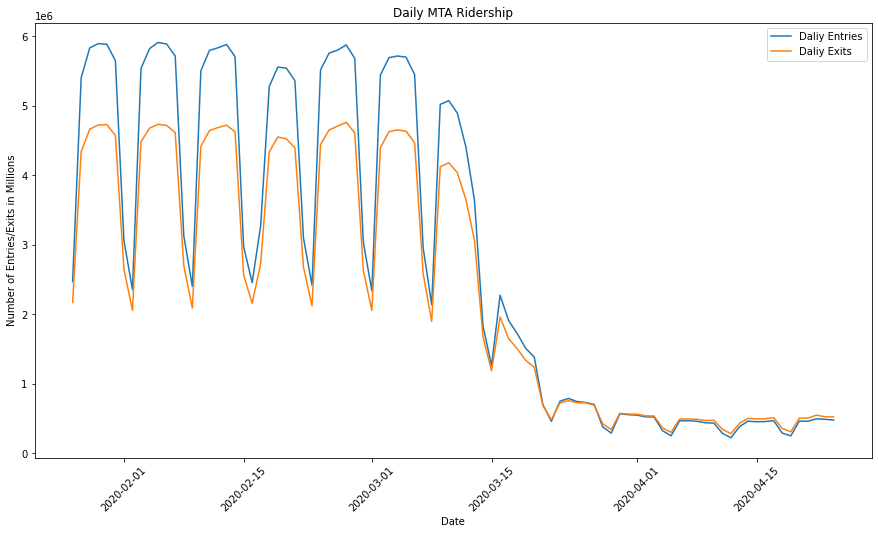

In [26]:
daily_total2020 = stations_daily2020.groupby('DATE').sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(daily_total2020['DATE'], daily_total2020['DAILY_ENTRIES'],label = "Daliy Entries")
plt.plot(daily_total2020['DATE'], daily_total2020['DAILY_EXITS'],label = "Daliy Exits")
plt.ylabel('Number of Entries/Exits in Millions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title('Daily MTA Ridership');

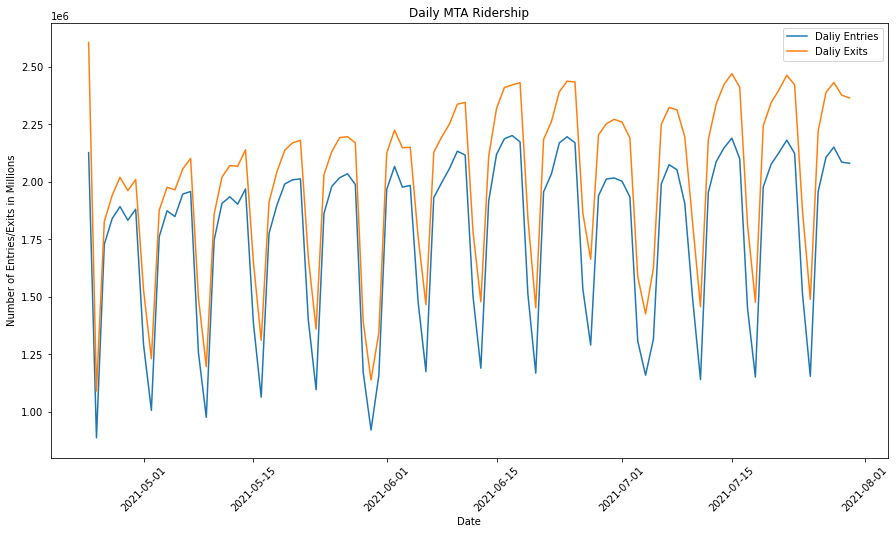

In [27]:
daily_total2021 = stations_daily2021.groupby('DATE').sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(daily_total2021['DATE'], daily_total2021['DAILY_ENTRIES'],label = "Daliy Entries")
plt.plot(daily_total2021['DATE'], daily_total2021['DAILY_EXITS'],label = "Daliy Exits")
plt.ylabel('Number of Entries/Exits in Millions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title('Daily MTA Ridership');

# Covid Data

In [28]:
covid = pd.read_csv("COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv")

In [29]:
covid['DATE_OF_INTEREST'] = pd.to_datetime(covid['DATE_OF_INTEREST'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE_OF_INTEREST                527 non-null    datetime64[ns]
 1   CASE_COUNT                      527 non-null    object        
 2   probable_case_count             527 non-null    object        
 3   HOSPITALIZED_COUNT              527 non-null    object        
 4   DEATH_COUNT                     527 non-null    int64         
 5   DEATH_COUNT_PROBABLE            527 non-null    int64         
 6   CASE_COUNT_7DAY_AVG             527 non-null    object        
 7   all_case_count_7day_avg         527 non-null    object        
 8   HOSP_COUNT_7DAY_AVG             527 non-null    object        
 9   DEATH_COUNT_7DAY_AVG            527 non-null    int64         
 10  all_death_count_7day_avg        527 non-null    int64         
 11  BX_CAS

In [30]:
covid

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_case_count,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2021-08-04,"1,527",426,66,4,2,"1,238","1,642",64,5,...,24,12,1,0,119,148,7,0,0,"11,000"
523,2021-08-05,"1,400",532,77,6,3,"1,258","1,680",65,5,...,35,3,1,0,118,147,6,0,0,"11,000"
524,2021-08-06,"1,356",442,92,6,3,"1,272","1,702",68,5,...,38,12,1,0,118,147,7,1,1,"11,000"
525,2021-08-07,943,354,54,6,3,"1,289","1,723",68,5,...,28,3,0,0,118,149,7,1,1,"11,000"


In [31]:
covid['CASE_COUNT'] = covid['CASE_COUNT'].str.replace(',', '')
covid['CASE_COUNT']
covid['probable_case_count'] = covid['probable_case_count'].str.replace(',', '')
covid['probable_case_count']

0        0
1        0
2        0
3        0
4        0
      ... 
522    426
523    532
524    442
525    354
526    316
Name: probable_case_count, Length: 527, dtype: object

In [32]:
covid = covid.astype({"CASE_COUNT": int, "probable_case_count": int})
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE_OF_INTEREST                527 non-null    datetime64[ns]
 1   CASE_COUNT                      527 non-null    int32         
 2   probable_case_count             527 non-null    int32         
 3   HOSPITALIZED_COUNT              527 non-null    object        
 4   DEATH_COUNT                     527 non-null    int64         
 5   DEATH_COUNT_PROBABLE            527 non-null    int64         
 6   CASE_COUNT_7DAY_AVG             527 non-null    object        
 7   all_case_count_7day_avg         527 non-null    object        
 8   HOSP_COUNT_7DAY_AVG             527 non-null    object        
 9   DEATH_COUNT_7DAY_AVG            527 non-null    int64         
 10  all_death_count_7day_avg        527 non-null    int64         
 11  BX_CAS

Text(0.5, 0, 'Date of Interest')

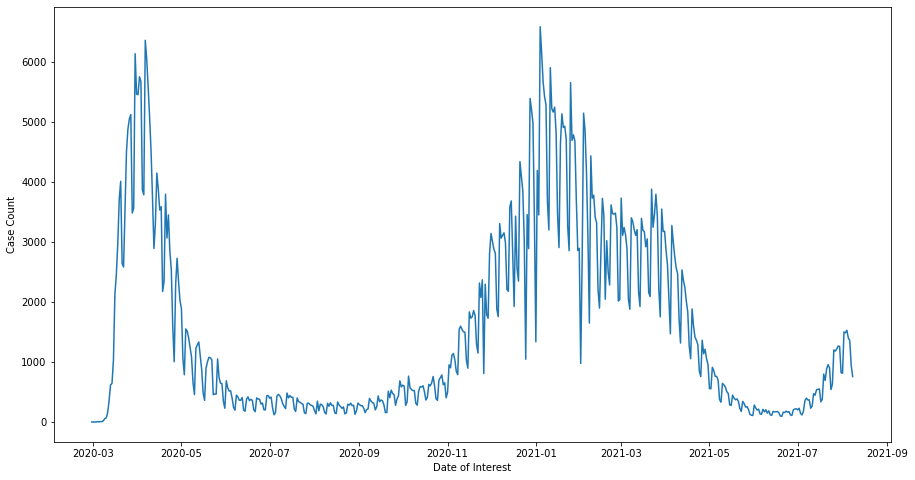

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(covid['DATE_OF_INTEREST'], covid['CASE_COUNT'])
plt.ylabel('Case Count')
plt.xlabel('Date of Interest')

# MTA recent ridership data

In [34]:
MTAridership = pd.read_csv("MTA_recent_ridership_data_20210810.csv")

In [35]:
MTAridership

,Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day,LIRR (Long Island Rail Road): Total Estimated Ridership,LIRR: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % Change From Pre-Pandemic Equivalent Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % Change From Pre-Pandemic Equivalent Day
0,8/10/2021,2331889,-54.70%,1072525,-45.70%,122500.0,-58%,95300.0,-63%,23079,-18.20%,905508,-0.10%
1,8/9/2021,2293339,-54.40%,1145099,-42.40%,109900.0,-62%,95600.0,-64%,20540,-21.60%,891525,-5.80%
2,8/8/2021,1333440,-46.20%,590527,-46.30%,61100.0,-35%,54300.0,-32%,11934,-33.00%,843489,-7.80%
3,8/7/2021,1780008,-41.10%,829668,-39.80%,76800.0,-32%,67300.0,-30%,14108,-17.00%,923751,-5.60%
4,8/6/2021,2523441,-51.20%,1208490,-40.00%,123200.0,-59%,101200.0,-62%,22179,-19.00%,979833,-4.20%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,3/5/2020,5513656,-4.40%,2244500,-1%,NaN,NaN,NaN,NaN,33209,7.10%,929298,-0.90%
524,3/4/2020,5515945,-3.20%,2177200,-3%,NaN,NaN,NaN,NaN,34297,8.70%,905558,-0.10%
525,3/3/2020,5498556,-3.90%,2228600,-3%,NaN,NaN,NaN,NaN,32767,6.90%,882175,-1.70%
526,3/2/2020,5347055,23.90%,2209100,40%,NaN,NaN,NaN,NaN,30338,28.20%,874620,27.50%


In [36]:
MTAridership['Date'] = pd.to_datetime(MTAridership['Date'])
MTAridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 13 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   Date                                                                     528 non-null    datetime64[ns]
 1   Subways: Total Estimated Ridership                                       528 non-null    int64         
 2   Subways: % Change From Pre-Pandemic Equivalent Day                       528 non-null    object        
 3   Buses: Total Estimated Ridership                                         528 non-null    int64         
 4   Buses: % Change From Pre-Pandemic Equivalent Day                         528 non-null    object        
 5   LIRR (Long Island Rail Road): Total Estimated Ridership                  497 non-null    float64       
 6   LIRR: % Change Fro

In [37]:
MTAridership = MTAridership.sort_values(by="Date")
MTAridership

,Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day,LIRR (Long Island Rail Road): Total Estimated Ridership,LIRR: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % Change From Pre-Pandemic Equivalent Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % Change From Pre-Pandemic Equivalent Day
527,2020-03-01,2214601,-1.30%,984900,1%,NaN,NaN,NaN,NaN,19922,18.80%,786961,7.80%
526,2020-03-02,5347055,23.90%,2209100,40%,NaN,NaN,NaN,NaN,30338,28.20%,874620,27.50%
525,2020-03-03,5498556,-3.90%,2228600,-3%,NaN,NaN,NaN,NaN,32767,6.90%,882175,-1.70%
524,2020-03-04,5515945,-3.20%,2177200,-3%,NaN,NaN,NaN,NaN,34297,8.70%,905558,-0.10%
523,2020-03-05,5513656,-4.40%,2244500,-1%,NaN,NaN,NaN,NaN,33209,7.10%,929298,-0.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-08-06,2523441,-51.20%,1208490,-40.00%,123200.0,-59%,101200.0,-62%,22179,-19.00%,979833,-4.20%
3,2021-08-07,1780008,-41.10%,829668,-39.80%,76800.0,-32%,67300.0,-30%,14108,-17.00%,923751,-5.60%
2,2021-08-08,1333440,-46.20%,590527,-46.30%,61100.0,-35%,54300.0,-32%,11934,-33.00%,843489,-7.80%
1,2021-08-09,2293339,-54.40%,1145099,-42.40%,109900.0,-62%,95600.0,-64%,20540,-21.60%,891525,-5.80%


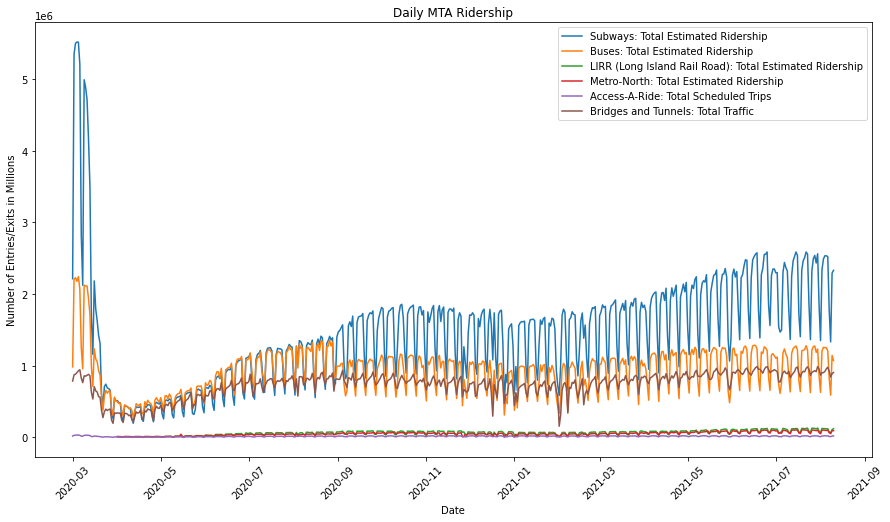

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(MTAridership['Date'], MTAridership['Subways: Total Estimated Ridership'], label='Subways: Total Estimated Ridership')
plt.plot(MTAridership['Date'], MTAridership['Buses: Total Estimated Ridership'], label='Buses: Total Estimated Ridership')
plt.plot(MTAridership['Date'], MTAridership['LIRR (Long Island Rail Road): Total Estimated Ridership'], label='LIRR (Long Island Rail Road): Total Estimated Ridership')
plt.plot(MTAridership['Date'], MTAridership['Metro-North: Total Estimated Ridership'], label='Metro-North: Total Estimated Ridership')
plt.plot(MTAridership['Date'], MTAridership['Access-A-Ride: Total Scheduled Trips'], label='Access-A-Ride: Total Scheduled Trips')
plt.plot(MTAridership['Date'], MTAridership['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels: Total Traffic')
plt.ylabel('Number of Entries/Exits in Millions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily MTA Ridership')
plt.legend()

In [39]:
MTAridership.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 527 to 0
Data columns (total 13 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   Date                                                                     528 non-null    datetime64[ns]
 1   Subways: Total Estimated Ridership                                       528 non-null    int64         
 2   Subways: % Change From Pre-Pandemic Equivalent Day                       528 non-null    object        
 3   Buses: Total Estimated Ridership                                         528 non-null    int64         
 4   Buses: % Change From Pre-Pandemic Equivalent Day                         528 non-null    object        
 5   LIRR (Long Island Rail Road): Total Estimated Ridership                  497 non-null    float64       
 6   LIRR: % Change Fro

# Merge Covid and Ridership Datasets 

In [40]:
Merge=covid.merge(MTAridership, left_on='DATE_OF_INTEREST', right_on='Date')
Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 75 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   DATE_OF_INTEREST                                                         526 non-null    datetime64[ns]
 1   CASE_COUNT                                                               526 non-null    int32         
 2   probable_case_count                                                      526 non-null    int32         
 3   HOSPITALIZED_COUNT                                                       526 non-null    object        
 4   DEATH_COUNT                                                              526 non-null    int64         
 5   DEATH_COUNT_PROBABLE                                                     526 non-null    int64         
 6   CASE_COUNT_7DAY_AV

In [41]:
Merge_Correlation=Merge[['CASE_COUNT','Subways: Total Estimated Ridership','Buses: Total Estimated Ridership','LIRR (Long Island Rail Road): Total Estimated Ridership','Metro-North: Total Estimated Ridership','Access-A-Ride: Total Scheduled Trips','Bridges and Tunnels: Total Traffic']]

Merge_Correlation

,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR (Long Island Rail Road): Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic
0,0,2214601,984900,NaN,NaN,19922,786961
1,0,5347055,2209100,NaN,NaN,30338,874620
2,1,5498556,2228600,NaN,NaN,32767,882175
3,5,5515945,2177200,NaN,NaN,34297,905558
4,3,5513656,2244500,NaN,NaN,33209,929298
...,...,...,...,...,...,...,...
521,1527,2533770,1252835,123700.0,99300.0,23611,921068
522,1400,2533933,1251820,120000.0,98300.0,22610,956306
523,1356,2523441,1208490,123200.0,101200.0,22179,979833
524,943,1780008,829668,76800.0,67300.0,14108,923751


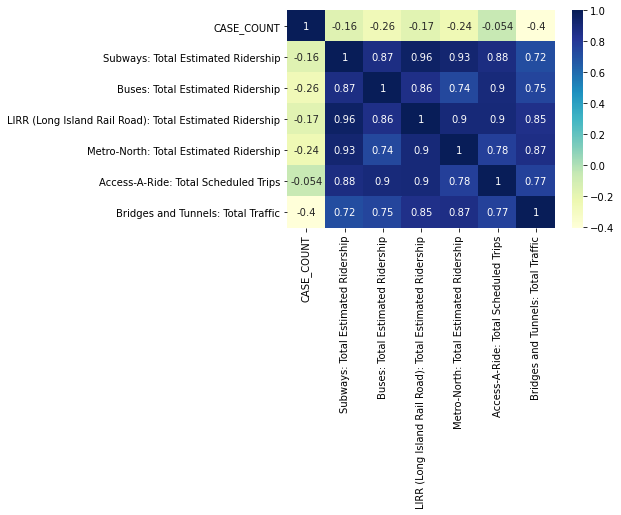

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
  

sns.heatmap(Merge_Correlation.corr(), annot=True, cmap="YlGnBu")
plt.show()

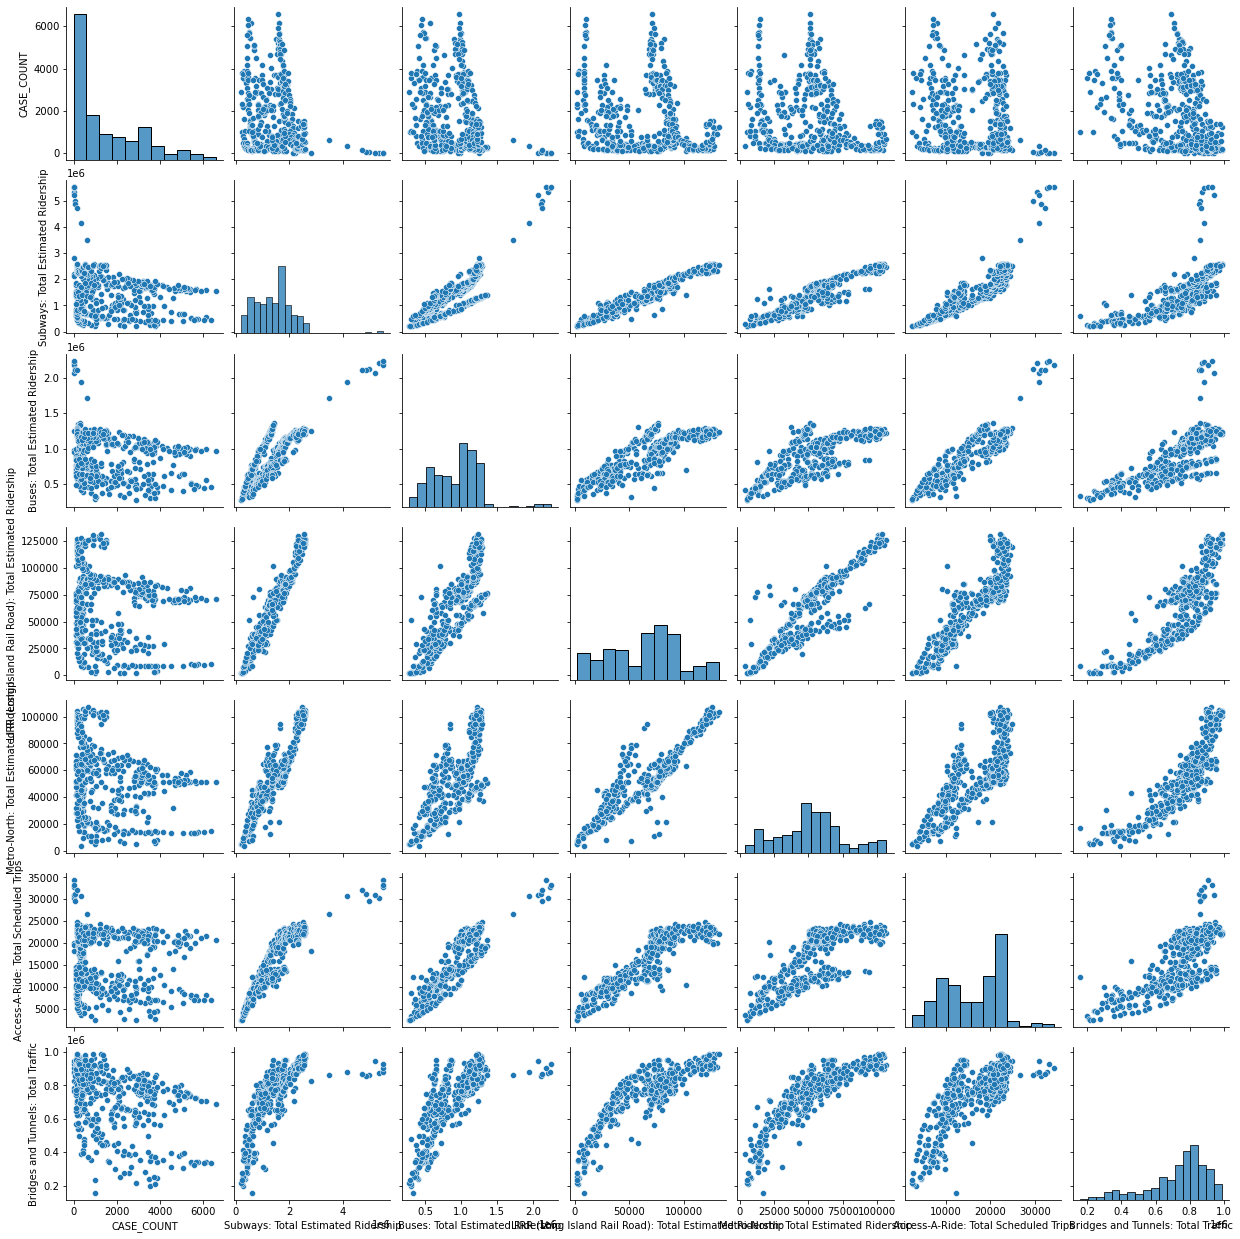

In [43]:
sns.pairplot(data=Merge_Correlation);

# Calculate the percentage change for each public transportation after pandemic

In [44]:
Merge_PercentageChange=Merge[['DATE_OF_INTEREST','CASE_COUNT','Subways: Total Estimated Ridership','Buses: Total Estimated Ridership','LIRR (Long Island Rail Road): Total Estimated Ridership','Metro-North: Total Estimated Ridership','Access-A-Ride: Total Scheduled Trips','Bridges and Tunnels: Total Traffic']]

Merge_PercentageChange

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR (Long Island Rail Road): Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic
0,2020-03-01,0,2214601,984900,NaN,NaN,19922,786961
1,2020-03-02,0,5347055,2209100,NaN,NaN,30338,874620
2,2020-03-03,1,5498556,2228600,NaN,NaN,32767,882175
3,2020-03-04,5,5515945,2177200,NaN,NaN,34297,905558
4,2020-03-05,3,5513656,2244500,NaN,NaN,33209,929298
...,...,...,...,...,...,...,...,...
521,2021-08-04,1527,2533770,1252835,123700.0,99300.0,23611,921068
522,2021-08-05,1400,2533933,1251820,120000.0,98300.0,22610,956306
523,2021-08-06,1356,2523441,1208490,123200.0,101200.0,22179,979833
524,2021-08-07,943,1780008,829668,76800.0,67300.0,14108,923751


No handles with labels found to put in legend.


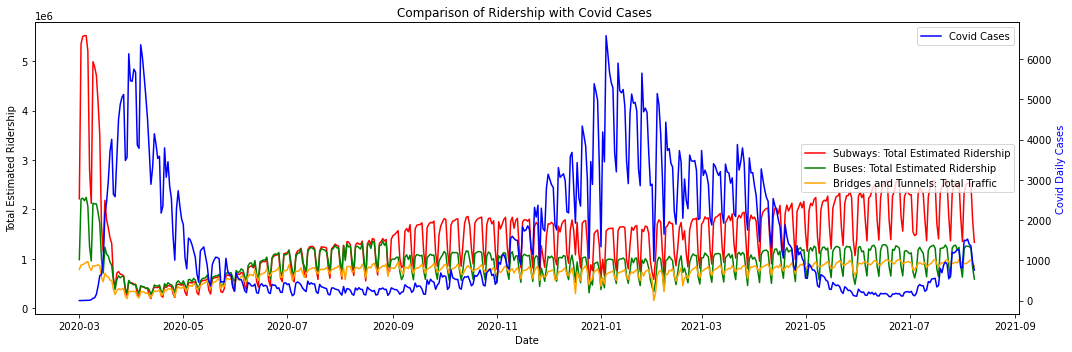

In [45]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Comparison of Ridership with Covid Cases ')
  

ax2 = ax.twinx()
ax.plot(Merge_PercentageChange['DATE_OF_INTEREST'], Merge_PercentageChange['Subways: Total Estimated Ridership'], label='Subways: Total Estimated Ridership', color = 'r')
ax.plot(Merge_PercentageChange['DATE_OF_INTEREST'], Merge_PercentageChange['Buses: Total Estimated Ridership'], label='Buses: Total Estimated Ridership', color = 'g')
ax.plot(Merge_PercentageChange['DATE_OF_INTEREST'], Merge_PercentageChange['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels: Total Traffic', color = 'orange')
plt.legend()
ax2.plot(Merge_PercentageChange['DATE_OF_INTEREST'], Merge_PercentageChange['CASE_COUNT'],label='Covid Cases', color = 'b')
  


ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Total Estimated Ridership',fontsize=10)


ax2.set_ylabel('Covid Daily Cases', color = 'b',fontsize=10)
ax.legend(loc=7)
ax2.legend(loc='center right',fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
Merge_PercentageChange_SelectDate=Merge_PercentageChange.loc[(Merge_PercentageChange['DATE_OF_INTEREST'] == '2020-03-01')|(Merge_PercentageChange['DATE_OF_INTEREST'] == '2021-08-08')]
Merge_PercentageChange_SelectDate

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR (Long Island Rail Road): Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic
0,2020-03-01,0,2214601,984900,NaN,NaN,19922,786961
525,2021-08-08,757,1333440,590527,61100.0,54300.0,11934,843489


In [47]:
Merge_PercentageChange_SelectDate_withoutDate=Merge_PercentageChange_SelectDate.drop(['DATE_OF_INTEREST'], axis=1)
Merge_PercentageChange_SelectDate_withoutDate.pct_change()

,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR (Long Island Rail Road): Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,inf,-0.397887,-0.400419,NaN,NaN,-0.400964,0.071831


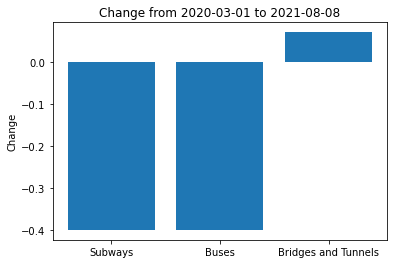

In [82]:
x = np.array(["Subways", "Buses", "Bridges and Tunnels"])
y = np.array([-0.4,-0.4, 0.07])
plt.title('Change from 2020-03-01 to 2021-08-08')
plt.ylabel('Change')
plt.bar(x,y)
plt.show()


In [48]:
Merge_PercentageChange

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,LIRR (Long Island Rail Road): Total Estimated Ridership,Metro-North: Total Estimated Ridership,Access-A-Ride: Total Scheduled Trips,Bridges and Tunnels: Total Traffic
0,2020-03-01,0,2214601,984900,NaN,NaN,19922,786961
1,2020-03-02,0,5347055,2209100,NaN,NaN,30338,874620
2,2020-03-03,1,5498556,2228600,NaN,NaN,32767,882175
3,2020-03-04,5,5515945,2177200,NaN,NaN,34297,905558
4,2020-03-05,3,5513656,2244500,NaN,NaN,33209,929298
...,...,...,...,...,...,...,...,...
521,2021-08-04,1527,2533770,1252835,123700.0,99300.0,23611,921068
522,2021-08-05,1400,2533933,1251820,120000.0,98300.0,22610,956306
523,2021-08-06,1356,2523441,1208490,123200.0,101200.0,22179,979833
524,2021-08-07,943,1780008,829668,76800.0,67300.0,14108,923751


In [49]:
Merge_PercentageChange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   DATE_OF_INTEREST                                         526 non-null    datetime64[ns]
 1   CASE_COUNT                                               526 non-null    int32         
 2   Subways: Total Estimated Ridership                       526 non-null    int64         
 3   Buses: Total Estimated Ridership                         526 non-null    int64         
 4   LIRR (Long Island Rail Road): Total Estimated Ridership  495 non-null    float64       
 5   Metro-North: Total Estimated Ridership                   495 non-null    float64       
 6   Access-A-Ride: Total Scheduled Trips                     526 non-null    int64         
 7   Bridges and Tunnels: Total Traffic                    

# A Historical Timeline of COVID-19 in New York City
March 1, 2020 First COVID-19 case in New York State
March 22, 2020 NYS on Pause Program begins, all non-essential workers must stay home

In [73]:
mask = (Merge_PercentageChange['DATE_OF_INTEREST'] > '2020-03-02') & (Merge_PercentageChange['DATE_OF_INTEREST'] <= '2020-03-22')
Merge_PercentageChange0320=(Merge_PercentageChange.loc[mask])
Merge_PercentageChange0320=Merge_PercentageChange0320[['DATE_OF_INTEREST','CASE_COUNT','Subways: Total Estimated Ridership','Buses: Total Estimated Ridership','Bridges and Tunnels: Total Traffic']]
Merge_PercentageChange0320

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
2,2020-03-03,1,5498556,2228600,882175
3,2020-03-04,5,5515945,2177200,905558
4,2020-03-05,3,5513656,2244500,929298
5,2020-03-06,8,5204732,2066700,945408
6,2020-03-07,7,2817082,1249100,827908
7,2020-03-08,21,2122328,957200,765084
8,2020-03-09,57,4989635,2124800,860073
9,2020-03-10,69,4883623,2112000,855585
10,2020-03-11,155,4712462,2113000,866706
11,2020-03-12,355,4163674,1938400,881188


No handles with labels found to put in legend.


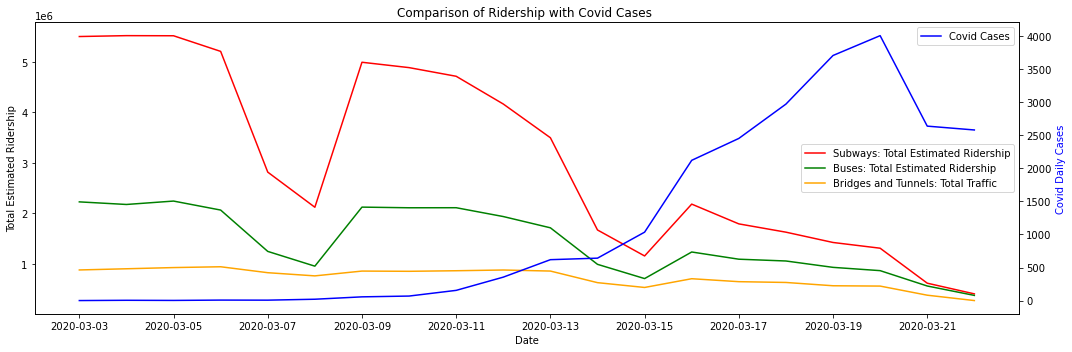

In [74]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Comparison of Ridership with Covid Cases ')
  

ax2 = ax.twinx()
ax.plot(Merge_PercentageChange0320['DATE_OF_INTEREST'], Merge_PercentageChange0320['Subways: Total Estimated Ridership'], label='Subways: Total Estimated Ridership', color = 'r')
ax.plot(Merge_PercentageChange0320['DATE_OF_INTEREST'], Merge_PercentageChange0320['Buses: Total Estimated Ridership'], label='Buses: Total Estimated Ridership', color = 'g')
ax.plot(Merge_PercentageChange0320['DATE_OF_INTEREST'], Merge_PercentageChange0320['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels: Total Traffic', color = 'orange')
plt.legend()
ax2.plot(Merge_PercentageChange0320['DATE_OF_INTEREST'], Merge_PercentageChange0320['CASE_COUNT'],label='Covid Cases', color = 'b')
  


ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Total Estimated Ridership',fontsize=10)


ax2.set_ylabel('Covid Daily Cases', color = 'b',fontsize=10)
ax.legend(loc='center right')
ax2.legend(loc=7,fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

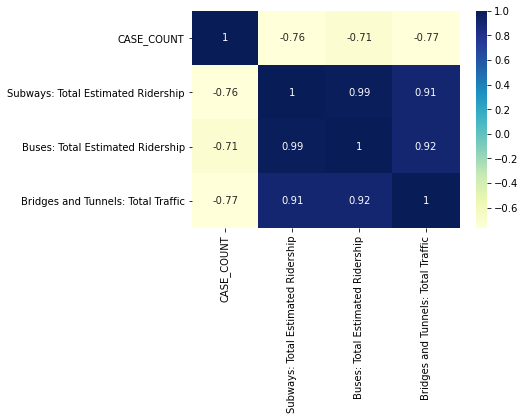

In [75]:
sns.heatmap(Merge_PercentageChange0320.corr(), annot=True, cmap="YlGnBu")
plt.show()

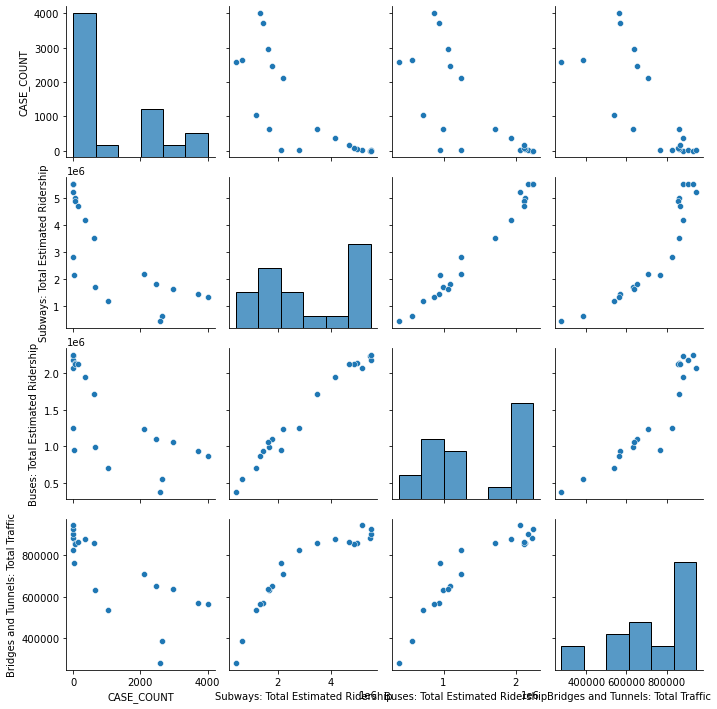

In [76]:
sns.pairplot(data=Merge_PercentageChange0320);

In [77]:
Merge_PercentageChange_SelectDate0320=Merge_PercentageChange0320.loc[(Merge_PercentageChange0320['DATE_OF_INTEREST'] == '2020-03-03') |(Merge_PercentageChange0320['DATE_OF_INTEREST'] == '2020-03-22')]
Merge_PercentageChange_SelectDate0320

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
2,2020-03-03,1,5498556,2228600,882175
21,2020-03-22,2580,409364,378900,277051


In [78]:
Merge_PercentageChange_SelectDate_withoutDate0320=Merge_PercentageChange_SelectDate0320.drop(['DATE_OF_INTEREST'], axis=1)
Merge_PercentageChange_SelectDate_withoutDate0320.pct_change()

,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
2,NaN,NaN,NaN,NaN
21,2579.0,-0.925551,-0.829983,-0.685946


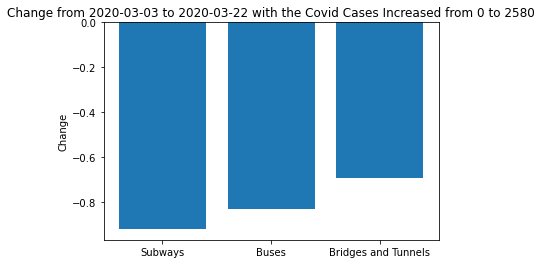

In [81]:
x = np.array(["Subways", "Buses", "Bridges and Tunnels"])
y = np.array([-0.92, -0.83, -0.69])
plt.title('Change from 2020-03-03 to 2020-03-22 with the Covid Cases Increased from 0 to 2580')
plt.ylabel('Change')
plt.bar(x,y)
plt.show()

In [56]:
mask = (Merge_PercentageChange['DATE_OF_INTEREST'] > '2020-03-22') & (Merge_PercentageChange['DATE_OF_INTEREST'] <= '2020-07-19')
Merge_PercentageChange0720=(Merge_PercentageChange.loc[mask])
Merge_PercentageChange0720=Merge_PercentageChange0720[['DATE_OF_INTEREST','CASE_COUNT','Subways: Total Estimated Ridership','Buses: Total Estimated Ridership','Bridges and Tunnels: Total Traffic']]
Merge_PercentageChange0720

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
22,2020-03-23,3570,711138,578200,361514
23,2020-03-24,4498,743314,657800,395493
24,2020-03-25,4874,691604,618000,375767
25,2020-03-26,5044,681923,646100,390117
26,2020-03-27,5118,658312,641800,396778
...,...,...,...,...,...
136,2020-07-15,440,1251164,1229000,803399
137,2020-07-16,411,1251884,1211800,819850
138,2020-07-17,413,1209692,1176200,819471
139,2020-07-18,216,779722,913700,747445


No handles with labels found to put in legend.


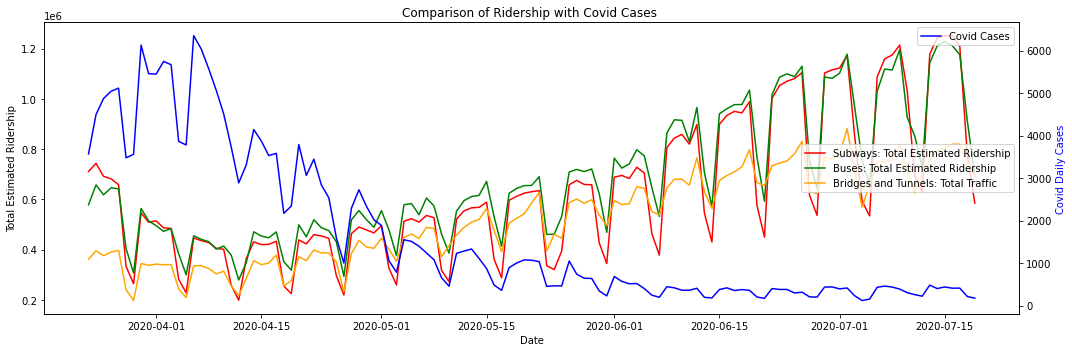

In [57]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Comparison of Ridership with Covid Cases ')
  

ax2 = ax.twinx()
ax.plot(Merge_PercentageChange0720['DATE_OF_INTEREST'], Merge_PercentageChange0720['Subways: Total Estimated Ridership'], label='Subways: Total Estimated Ridership', color = 'r')
ax.plot(Merge_PercentageChange0720['DATE_OF_INTEREST'], Merge_PercentageChange0720['Buses: Total Estimated Ridership'], label='Buses: Total Estimated Ridership', color = 'g')
ax.plot(Merge_PercentageChange0720['DATE_OF_INTEREST'], Merge_PercentageChange0720['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels: Total Traffic', color = 'orange')
plt.legend()
ax2.plot(Merge_PercentageChange0720['DATE_OF_INTEREST'], Merge_PercentageChange0720['CASE_COUNT'],label='Covid Cases', color = 'b')
  


ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Total Estimated Ridership',fontsize=10)


ax2.set_ylabel('Covid Daily Cases', color = 'b',fontsize=10)
ax.legend(loc='center right')
ax2.legend(loc=7,fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

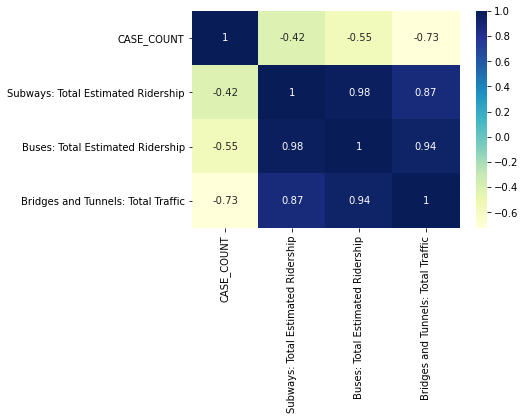

In [58]:
sns.heatmap(Merge_PercentageChange0720.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [59]:
Merge_PercentageChange_SelectDate0720=Merge_PercentageChange0720.loc[(Merge_PercentageChange0720['DATE_OF_INTEREST'] == '2020-03-23') |(Merge_PercentageChange0720['DATE_OF_INTEREST'] == '2020-07-19')]
Merge_PercentageChange_SelectDate0720

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
22,2020-03-23,3570,711138,578200,361514
140,2020-07-19,176,585498,692800,696110


In [60]:
Merge_PercentageChange_SelectDate_withoutDate0720=Merge_PercentageChange_SelectDate0720.drop(['DATE_OF_INTEREST'], axis=1)
Merge_PercentageChange_SelectDate_withoutDate0720.pct_change()

,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
22,NaN,NaN,NaN,NaN
140,-0.9507,-0.176675,0.198201,0.925541


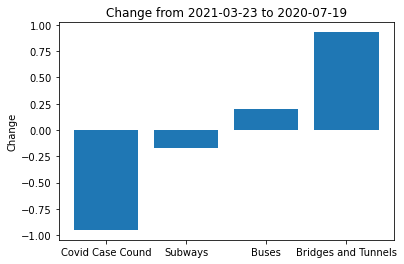

In [71]:
x = np.array(["Covid Case Cound", "Subways", "Buses", "Bridges and Tunnels"])
y = np.array([-0.95, -0.17, 0.2, 0.93])
plt.title('Change from 2021-03-23 to 2020-07-19')
plt.ylabel('Change')
plt.bar(x,y)
plt.show()


In [61]:
mask = (Merge_PercentageChange['DATE_OF_INTEREST'] > '2021-02-14') & (Merge_PercentageChange['DATE_OF_INTEREST'] <= '2021-08-17')
Merge_PercentageChange0221=(Merge_PercentageChange.loc[mask])
Merge_PercentageChange0221=Merge_PercentageChange0221[['DATE_OF_INTEREST','CASE_COUNT','Subways: Total Estimated Ridership','Buses: Total Estimated Ridership','Bridges and Tunnels: Total Traffic']]
Merge_PercentageChange0221

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
351,2021-02-15,2851,1220357,726412,641883
352,2021-02-16,3723,1630739,963223,726224
353,2021-02-17,3438,1736509,1061711,821333
354,2021-02-18,2044,1384407,725951,456327
355,2021-02-19,3019,1568728,809308,608152
...,...,...,...,...,...
521,2021-08-04,1527,2533770,1252835,921068
522,2021-08-05,1400,2533933,1251820,956306
523,2021-08-06,1356,2523441,1208490,979833
524,2021-08-07,943,1780008,829668,923751


No handles with labels found to put in legend.


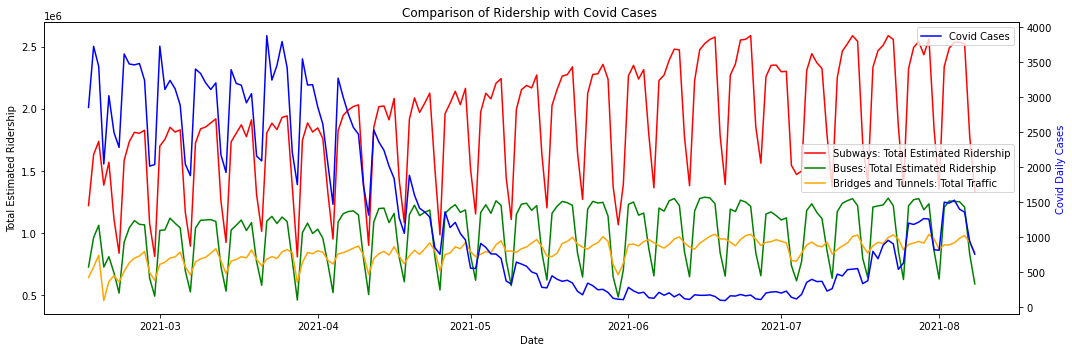

In [62]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Comparison of Ridership with Covid Cases ')
  

ax2 = ax.twinx()
ax.plot(Merge_PercentageChange0221['DATE_OF_INTEREST'], Merge_PercentageChange0221['Subways: Total Estimated Ridership'], label='Subways: Total Estimated Ridership', color = 'r')
ax.plot(Merge_PercentageChange0221['DATE_OF_INTEREST'], Merge_PercentageChange0221['Buses: Total Estimated Ridership'], label='Buses: Total Estimated Ridership', color = 'g')
ax.plot(Merge_PercentageChange0221['DATE_OF_INTEREST'], Merge_PercentageChange0221['Bridges and Tunnels: Total Traffic'], label='Bridges and Tunnels: Total Traffic', color = 'orange')
plt.legend()
ax2.plot(Merge_PercentageChange0221['DATE_OF_INTEREST'], Merge_PercentageChange0221['CASE_COUNT'],label='Covid Cases', color = 'b')
  


ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Total Estimated Ridership',fontsize=10)


ax2.set_ylabel('Covid Daily Cases', color = 'b',fontsize=10)
ax.legend(loc='center right')
ax2.legend(loc=7,fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

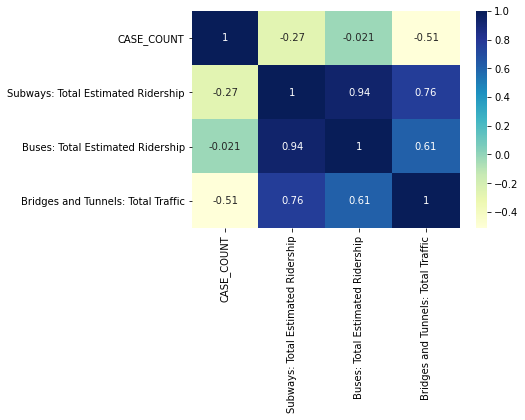

In [63]:
sns.heatmap(Merge_PercentageChange0221.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [64]:
Merge_PercentageChange_SelectDate0221=Merge_PercentageChange0221.loc[(Merge_PercentageChange0221['DATE_OF_INTEREST'] == '2021-02-15') |(Merge_PercentageChange0221['DATE_OF_INTEREST'] == '2021-08-08')]
Merge_PercentageChange_SelectDate0221

,DATE_OF_INTEREST,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
351,2021-02-15,2851,1220357,726412,641883
525,2021-08-08,757,1333440,590527,843489


In [65]:
Merge_PercentageChange_SelectDate_withoutDate0221=Merge_PercentageChange_SelectDate0221.drop(['DATE_OF_INTEREST'], axis=1)
Merge_PercentageChange_SelectDate_withoutDate0221.pct_change()

,CASE_COUNT,Subways: Total Estimated Ridership,Buses: Total Estimated Ridership,Bridges and Tunnels: Total Traffic
351,NaN,NaN,NaN,NaN
525,-0.734479,0.092664,-0.187063,0.314085


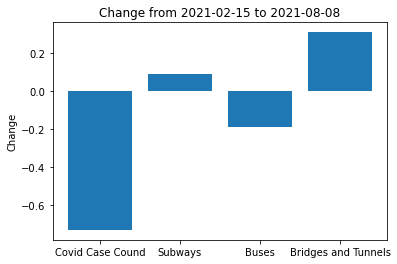

In [72]:
x = np.array(["Covid Case Cound", "Subways", "Buses", "Bridges and Tunnels"])
y = np.array([-0.73, 0.09, -0.19, 0.31])

plt.title('Change from 2021-02-15 to 2021-08-08')
plt.ylabel('Change')
plt.bar(x,y)
plt.show()





